In [2]:
import os

# 假设有两个文件路径
file1_path = '/home/disk3/jsa/projects/TLD_backend/src/main/algorithm/main/main.py'
file2_path = '/home/disk3/jsa/projects/TLD_backend/src/main/java/org/zjuvipa/util/PythonCallerUtil.java'
file3_path = '/home/disk3/jsa/projects/TLD_backend/src/main/java/org/zjuvipa/DemoApplication.java'
# 计算相对路径
relative_path = os.path.relpath(file1_path, os.path.dirname(file3_path))

print("Relative path from file2 to file1:", relative_path)

Relative path from file2 to file1: ../../../algorithm/main/main.py


In [4]:
%matplotlib inline
import cv2
import img_processing as ip
import matplotlib.pyplot as plt
image_path=r"D:\PycharmProjects\TLD\src\main\algorithm\test\case1\3-DK324+390-535GD P_1.JPG"
image=cv2.imread(image_path)
original_line = ip.horizon_line(image[:, 63:64])
if original_line:
    original_line = original_line.pop() + 1
else:
    raise ValueError("No horizontal line found in the specified range.")
print(original_line)
vertical_position = image[original_line:, 48:54]
# plt.figure(figsize=(10, 10))
# plt.imshow(image[20:30,20:30],cmap='gray')
# plt.show()

分界线位置：43, 像素均值：2.0

44


In [6]:
a = []
b = []
c = 1
d = None
a.append(b)
a.append(c)
a.append(d)
print(a)

[[], 1, None]


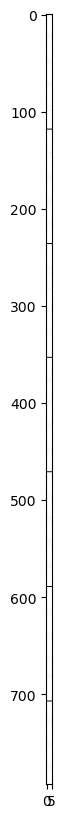

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(vertical_position,cmap='gray')
plt.show()

In [8]:
vertical_position = image[original_line:, 48:54]  # (水平，垂直)
black_lines = ip.find_black_horizontal_lines(vertical_position)
print(black_lines)
vertical_resolution = ip.compute_vertical_resolutio(1.50, black_lines)
# vertical_resolution = vertical_resolution
print(vertical_resolution)

ValueError: invalid literal for int() with base 10: ''